#Midterm assignment Linear Algebra HS24

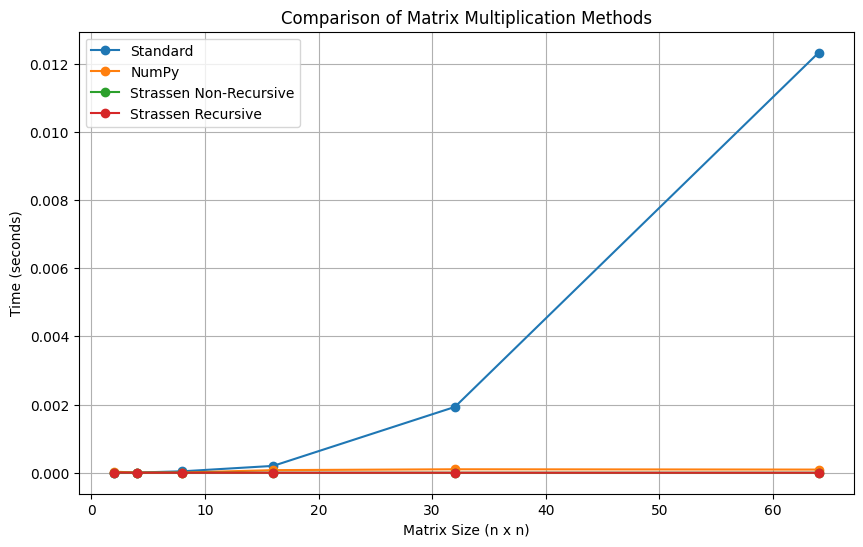

In [9]:
import time
import random
import numpy as np  # For optimized matrix multiplication
import matplotlib.pyplot as plt  # For plotting performance comparison

# Function to generate a square matrix of random integers
def generate_square_matrix(n, min_val=0, max_val=10):
    """
    Generates an n x n matrix with random integer values between min_val and max_val.
    
    Args:
        n: Size of the matrix (n x n).
        min_val: Minimum value for random integers (inclusive).
        max_val: Maximum value for random integers (inclusive).

    Returns:
        A square matrix as a list of lists.
    """
    return [[random.randint(min_val, max_val) for _ in range(n)] for _ in range(n)]

# Standard matrix multiplication using nested loops
def matrix_multiply(A, B):
    """
    Performs standard matrix multiplication on two square matrices, A and B.
    """
    n = len(A)
    result = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Strassen's algorithm (non-recursive version for 2x2 matrices)
def strassen_non_recursive(A, B):
    """
    Performs matrix multiplication on 2x2 matrices using Strassen's algorithm.
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("strassen_non_recursive is only implemented for 2x2 matrices.")
    
    a, b = A[0][0], A[0][1]
    c, d = A[1][0], A[1][1]
    e, f = B[0][0], B[0][1]
    g, h = B[1][0], B[1][1]

    M1 = (a + d) * (e + h)
    M2 = (c + d) * e
    M3 = a * (f - h)
    M4 = d * (g - e)
    M5 = (a + b) * h
    M6 = (c - a) * (e + f)
    M7 = (b - d) * (g + h)

    c00 = M1 + M4 - M5 + M7
    c01 = M3 + M5
    c10 = M2 + M4
    c11 = M1 - M2 + M3 + M6

    return [[c00, c01], [c10, c11]]

# Strassen's algorithm (recursive version for 2x2 matrices)
def strassen_recursive(A, B):
    """
    Recursively performs Strassen's matrix multiplication on 2x2 matrices.
    Handles the base case for 1x1 matrices during recursion.
    """
    # Base case: 1x1 matrix
    if len(A) == 1 and len(A[0]) == 1:
        return [[A[0][0] * B[0][0]]]

    # Check for valid 2x2 input at the top level
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("strassen_recursive is only implemented for 2x2 matrices.")

    # Decompose the matrices into their elements
    a, b = A[0][0], A[0][1]
    c, d = A[1][0], A[1][1]
    e, f = B[0][0], B[0][1]
    g, h = B[1][0], B[1][1]

    # Recursive calls for Strassen's seven products
    M1 = strassen_recursive([[a + d]], [[e + h]])[0][0]
    M2 = strassen_recursive([[c + d]], [[e]])[0][0]
    M3 = strassen_recursive([[a]], [[f - h]])[0][0]
    M4 = strassen_recursive([[d]], [[g - e]])[0][0]
    M5 = strassen_recursive([[a + b]], [[h]])[0][0]
    M6 = strassen_recursive([[c - a]], [[e + f]])[0][0]
    M7 = strassen_recursive([[b - d]], [[g + h]])[0][0]

    c00 = M1 + M4 - M5 + M7
    c01 = M3 + M5
    c10 = M2 + M4
    c11 = M1 - M2 + M3 + M6

    return [[c00, c01], [c10, c11]]

# Benchmarking function
def benchmark(function, A, B):
    """
    Benchmarks a given matrix multiplication function over a single run.
    """
    start_time = time.time()
    function(A, B)
    end_time = time.time()
    return end_time - start_time

# Main function to benchmark and plot all methods
def main():
    sizes = [2, 4, 8, 16, 32, 64]  # Matrix sizes to test
    times = {
        "Standard": [],
        "NumPy": [],
        "Strassen Non-Recursive": [],
        "Strassen Recursive": [],
    }

    for n in sizes:
        A = generate_square_matrix(n)
        B = generate_square_matrix(n)

        # Standard multiplication
        times["Standard"].append(benchmark(matrix_multiply, A, B))

        # NumPy multiplication
        np_A = np.array(A)
        np_B = np.array(B)
        times["NumPy"].append(benchmark(lambda x, y: np.dot(x, y), np_A, np_B))

        # Strassen Non-Recursive (only for 2x2 matrices)
        if n == 2:
            times["Strassen Non-Recursive"].append(benchmark(strassen_non_recursive, A, B))
        else:
            times["Strassen Non-Recursive"].append(0)

        # Strassen Recursive (only for 2x2 matrices)
        if n == 2:
            times["Strassen Recursive"].append(benchmark(strassen_recursive, A, B))
        else:
            times["Strassen Recursive"].append(0)

    # Plot results
    plt.figure(figsize=(10, 6))
    for method, time_list in times.items():
        valid_times = [time for time in time_list]
        plt.plot(sizes, valid_times, label=method, marker='o')

    plt.xlabel("Matrix Size (n x n)")
    plt.ylabel("Time (seconds)")
    plt.title("Comparison of Matrix Multiplication Methods")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()
